# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [87]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from decimal import Decimal

# import libraries for data visualization
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

# command to tell Python to display graphs
%matplotlib inline

# command to tell Python to ignore warnings
warnings.filterwarnings("ignore")

# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Understanding the structure of the data

In [88]:
# allow Colab to access my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# read the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/foodhub_order.csv')

# check data import is correct. Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [90]:
# Displaying the number of rows and columns of the dataset using shape attribute
print("There is total of :", df.shape[0], 'rows and', df.shape[1], "columns.")

There is total of : 1898 rows and 9 columns.


#### Observations:
The dataset has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [91]:
# To print a concise summary of the DataFrame datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*   There are attributes of datatype : integer, float and objects (having text)in the dataset
*   Non-Null shows there is no missing or incomplete data
*   We also have the value of rangeindex provided for the index axis
*   The column rating should be numerical. Hence Object data type indicates the column contains some string value in them. We would need to look into this further if required


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [92]:
# Check to see if there are any missing data in each column. 
# df.isnull().sum().sum() returns the total number of missing values which is 0

df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- There are no missing data in the number of cells in each column of the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [129]:
# Display the statistical summary of the dataset for all the columns including categorical
# T is used to transpose the matrix for readability

df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00
total_time,1898.00,NaN,NaN,NaN,51.53,6.83,35.00,47.00,52.00,56.00,68.00


#### Observations:
- Food preparation time upon receiving an order ranges from 20min (min) to 35min (max), with average time taking approximately 27min
- Cost of an order ranges between USD4.47 (lowest) to USD35.41 (highest)
- Food delivery time can take from as little as 15 minutes to 33 minutes
- The median (50%) cost of order is less than the mean indicating a positive skew
- The mean value for food preparation time is 27.37 minutes which is very close to the median value 27 minutes. This suggests that the data is roughly symmetric

### **Question 5:** How many orders are not rated? [1 mark]

In [94]:
# To output the number of orders not given a rating, we use the value_counts() method
# Here, the particular column name rating is passed only

not_rated = df['rating'].value_counts()['Not given']
print('Orders not given a rating is :',not_rated)
 

Orders not given a rating is : 736


#### Observations:
A total of 736 orders are not given any ratings

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### *ANALYSIS ON CUSTOMER, CUISINE AND RESTAURANT*

In [95]:
# displaying the number of order_id (unique) to see if there are any duplicates, meaning a user orders more than one food cuisine per transaction
df['order_id'].nunique()

1898

In [96]:
# displaying the number of customers (unique) using FoodHub from the dataset
print('The number of unique patrons using FoodHub are:',df['customer_id'].nunique())

The number of unique patrons using FoodHub are: 1200


In [97]:
# displaying the number of restaurants (unique) participating in FoodHub from the dataset

print('The number of unique restaurants participating in FoodHub are:',df['restaurant_name'].nunique())

The number of unique restaurants participating in FoodHub are: 178


The total number of cuisines offered by FoodHub are: 14


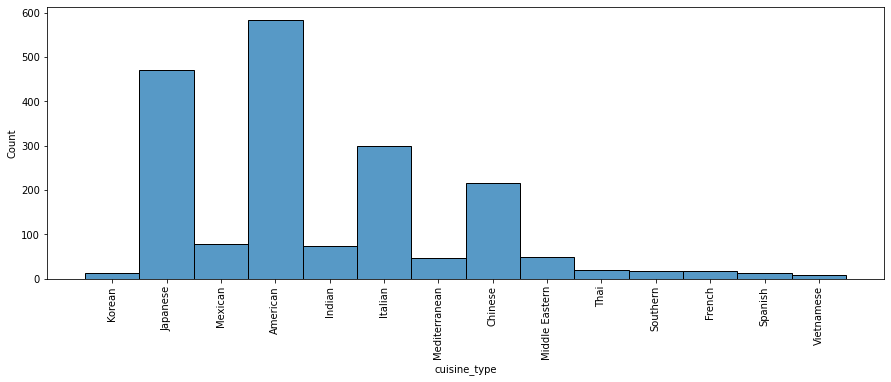

In [98]:
# set cuisine to be the number of unique cuisines offered by FoodHub
cuisine = df['cuisine_type'].nunique()

# display the total number of unique cuisines
print('The total number of cuisines offered by FoodHub are:',cuisine)

# plot the histogram to show the total order by cuisines 
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
sns.histplot(data = df, x= "cuisine_type");

**Observation**
- There is a total of 1898 orders in the dataset. Hence there is only 1 food order per transaction. 
- There is a total of 1200 users registered with FoodHub. Therefore a user may have more than one order choice
- There is a total of 178 types of restaurant (unique) and 
- 14 types of cuisine offered by FoodHub
- The most frequent cuisine ordered using FoodHub is American cuisine

### *COST OF ORDER*

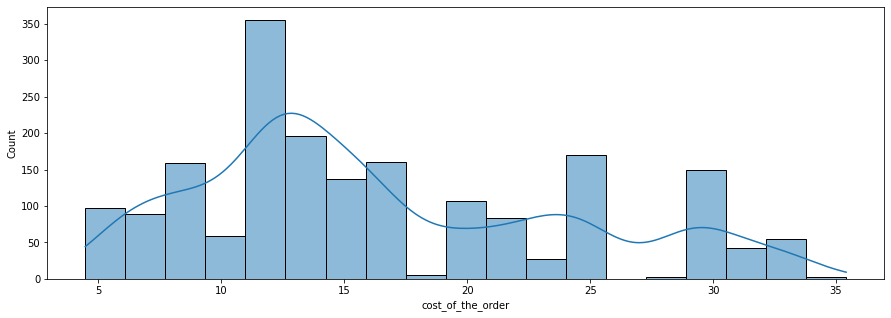

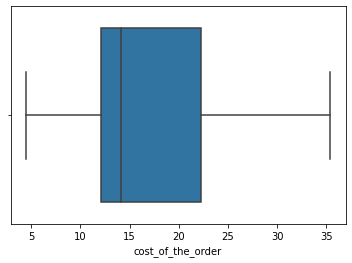

In [99]:
# displaying the distribution of the cost of order using a histogram and boxplot

plt.figure(figsize=(15,5))
sns.histplot(data = df, x= "cost_of_the_order", kde= True);
plt.show()

sns.boxplot(data = df, x="cost_of_the_order")
plt.show()

### Observation
- Above boxplot and KDE graph shows positive distribution or right skew distribution with no outliers
- From the Histogram, we note that the highest frequency of food order is about USD11-12
- From the boxplot, we can deduce that approximately 25% of the food cost order is priced above USD22
- The median cost of order is approximately USD14
- The median (approximately USD14) is less than the mean ($16.50), retrieved from the above data statistics summary. This suggests that the distribution of the cost of orders is positively skewed, meaning that there are a few high values that are pushing the mean higher than the median.

- This can also be observed in the quartiles, as Q3 (75%) is much higher than Q2(50%)  $14.14. This indicates that there are few high values in the dataset that is affecting the overall mean.

### *DELIVERY TIME*

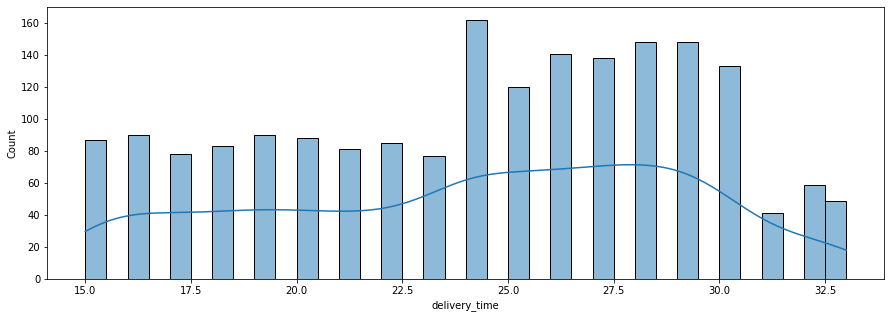

In [100]:
# histogram distribution of delivery time

plt.figure(figsize=(15,5))
#sns.histplot(data = df, x= "delivery_time", hue = "day_of_the_week", binwidth = 0.5, kde= True);
sns.histplot(data = df, x= "delivery_time", binwidth = 0.5,kde= True);

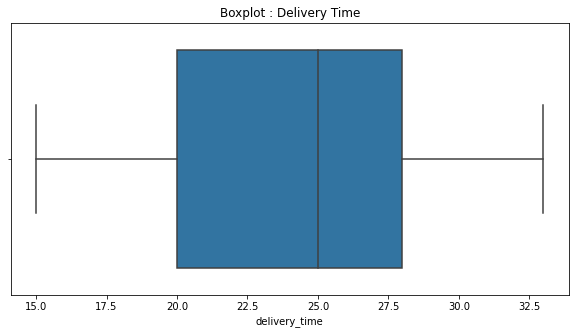

In [101]:
# boxplot observation on delivery time

plt.figure(figsize=(10,5))
plt.title('Boxplot : Delivery Time')
sns.boxplot(data = df, x= "delivery_time");
plt.show()

# plt.figure(figsize=(10,5))
# sns.boxplot(data = df, x= 'delivery_time', y = 'day_of_the_week');     # boxplot of delivery time by type of day
# plt.show()

**Observation**
- The mean value for food delivery time is 24.16 minutes, which is very close to the median value 25 minutes in the boxplot. This suggests that the data is roughly symmetric.
- Majority of the food delivery time falls between 20 minutes and 28 minutes, with the average delivery time (Q2) at 25 minutes
- There are no outliers seen in the box plot here. However, the fact that the minimum whisker is at 15 minutes and the max whisker at 33 minutes indicates that there are some outliers, which are values that fall outside of the whiskers and beyond 1.5 times the IQR. This might mean that there are some delays in delivery due to some unforeseen circumstances such as traffic, distance, or other factors.
- The whiskers are the same or almost the same length indicating that the distribution is approximately symmetric as well.

### *FOOD PREPARATION TIME*

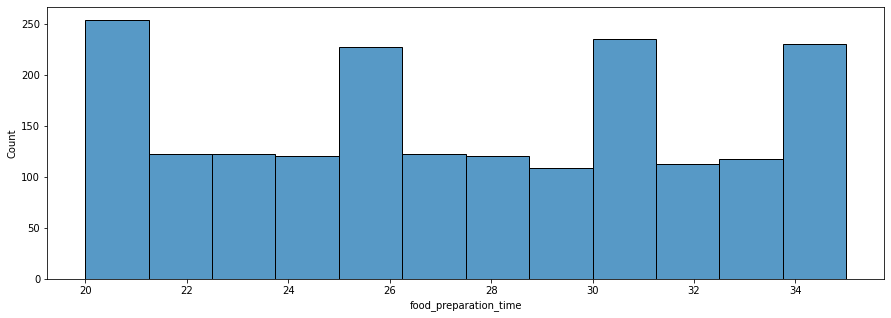

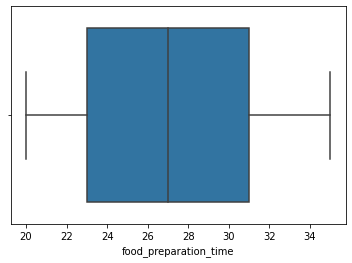

In [102]:
# analysis on food preparation time using histplot and boxplot

plt.figure(figsize=(15,5))
sns.histplot(data = df, x ="food_preparation_time");
plt.show()

sns.boxplot(data = df, x ="food_preparation_time");
plt.show()

**Observation**
- Majority of the food preparation time falls between 23 minutes and 31 minutes, with the average delivery time (Q2) at 27 minutes
- The highest time taken for food preparation is approximately 35 minutes and the lowest times taken for food preparation is approximately 20 mintes
- We can say that the distribution is symmetrical as the median is at the center of the interquartile range
- There are no outliers in the food preparation time dataset
- The distribution is positively skewed, because the whisker and half-box are longer on the right side of the median than on the left side

### *FOOD RATINGS*

The rating counts given by FoodHub patrons are: 
 Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


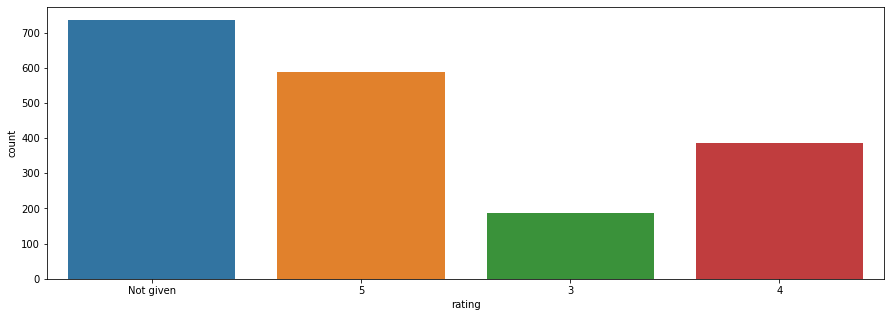

In [103]:
# analysis of food ratings in data set
# set ratings to be the number of unique ratings given by patrons
ratings = df['rating'].value_counts()

# display the total number of unique ratings
print('The rating counts given by FoodHub patrons are:', '\n', ratings)

# Food rating is an object Dtype. Therefore use a countplot to show the counts of observations in each categorical bin using bars
plt.figure(figsize=(15,5))
sns.countplot(data = df, x= 'rating');
plt.show()

**Observation**
- Lowest count for food rating given is 3, with a total count of 188
- Highest count of ratings fall in the category of Not given at 736 followed by the rating of '5' at the count of 588

### *ORDER DAY OF THE WEEK*

The total food ordered by day are: 
   Day of Week  Count
0     Weekend   1351
1     Weekday    547


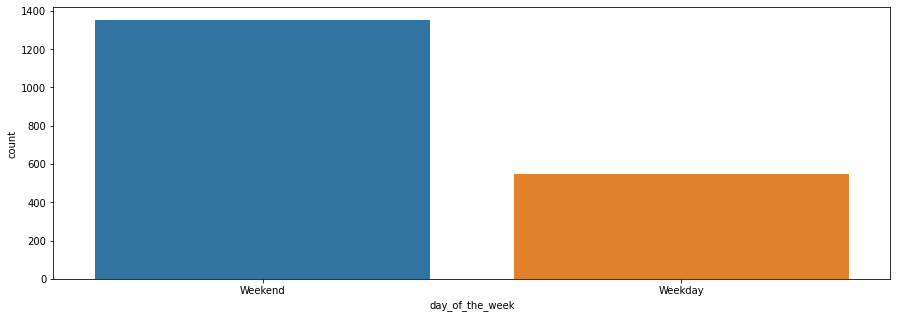

In [104]:
# show the number of orders by day from the dataset

day = df['day_of_the_week'].value_counts().reset_index()
day.columns = ["Day of Week", "Count"]
print('The total food ordered by day are:','\n',day)

# using a countplot to show the categorical display
plt.figure(figsize=(15,5))
sns.countplot(data = df, x="day_of_the_week")
plt.show()

**Observation**

There is more food orders during the Weekend (1351) as compared to Weekdays (547)

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [105]:
# To list the first 5 (highest) restaurants with most orders, using slice
df['restaurant_name'].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the most ordered from restaurants.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [106]:
# select and assign all the orders for the weekend only into a table
set_wknd = df[df['day_of_the_week'] == 'Weekend']

# now list down the cuisine type from the above table
set_wknd['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

The most popular wekeend orders are of American cuisine

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [107]:
# First list down the count of all orders which is greater than $20
order_count = df[df['cost_of_the_order']>20]
print('Total number of orders costing more than 20 dollars is:', order_count.shape[0])   # shape[0] to display the row value only of the tuple

# next to calculate the percentage of orders
order_percentage = (order_count.shape[0] / df.shape[0]) * 100                             # total order count > 20 over total orders in table * 100  
print('Percentage of orders costing more than 20 dollars is:', round(order_percentage),'%')    

Total number of orders costing more than 20 dollars is: 555
Percentage of orders costing more than 20 dollars is: 29 %


#### Observations:
Total number of orders in the dataset costing more than USD20 is 555 orders.

Therefore in terms of percentage, the cost of orders exceeding USD20 is 29%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [108]:
# To get the mean order delivery time from the dataset
mean_time = np.mean(df['delivery_time'])

# To output the results, rounded to 2 decimal values
print('The mean delivery time for food order is',round(mean_time,2),'minutes')

The mean delivery time for food order is 24.16 minutes


#### Observations:
The mean delivery time for the food order in the data set is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [109]:
# List the most frequent customers (customer_id)

cust = df['customer_id'].value_counts().reset_index()
cust.columns = ["Customer ID", "Order Count"]
print('The top 3 most frequent customers are :','\n',cust.head(3))    # use the head () function to list the top n values

The top 3 most frequent customers are : 
    Customer ID  Order Count
0        52832           13
1        47440           10
2        83287            9


#### Observations:
The top 3 customers (Customer ID) using FoodHub app are : 52832, 47440 and 83287 with total orders of 13, 10 and 9 respectively

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### *ANALYSIS ON THE COST OF ORDERS*

The total sum of food ordered by day type is: 
   day_of_the_week  cost_of_the_order
0         Weekday            8922.22
1         Weekend           22392.60


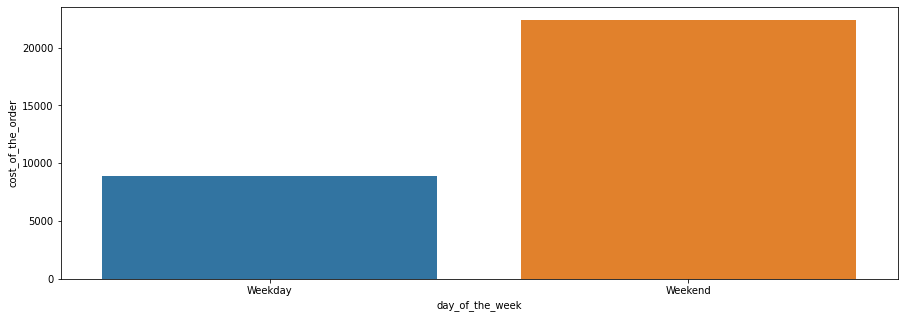

In [110]:
# Plot and show the sum of total cost of orders by the day type

#Groups the data by "day_of_the_week" and calculate the sum of the "cost_of_the_order" column for each group
#assign the result to the variable "df_sum_by_daytype"
#use the reset index of the resulting dataframe, so that "day_of_the_week" becomes a column instead of the index

df_sum_by_daytype = df.groupby('day_of_the_week')['cost_of_the_order'].sum().reset_index()     
print('The total sum of food ordered by day type is:','\n',df_sum_by_daytype)

# using a barplot to show the categorical display
plt.figure(figsize=(15,5))
sns.barplot(data = df_sum_by_daytype, x='day_of_the_week',y='cost_of_the_order')
plt.show()

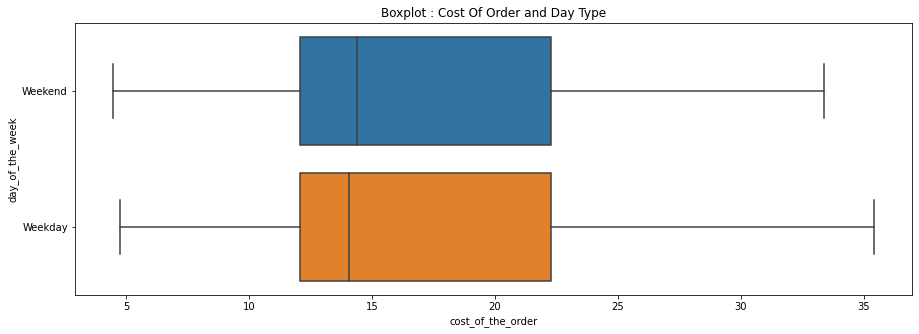

In [111]:
# show the cost of order categorized and day of the week
plt.figure(figsize=(15,5))
plt.title('Boxplot : Cost Of Order and Day Type')
sns.boxplot(data = df, x ="cost_of_the_order", y="day_of_the_week");

**Observation Comparison**
- There is more revenue generated from Weekend orders as compared to Weekdays.
- There is no outliers (far out values) for the cost of order by day type which may require a closer look, if necessary
- Overall, the two sets of data look as if they were generally distributed in a similar way, with one data set located to the right (larger location) of the other. 
- You can observe that the median cost of order for weekdays is slightly less than the lower quartile of the cost of order for weekends (that is, over three-quarters of the cost of order were more than the median cost of order for the weekday. 
- The interquartile ranges (data distribution) are similar for both day types (as shown by the lengths of the boxes) though the overall range of data set is greater for weekday (as shown by the length between the ends of the two whiskers for each boxplot).
- Both box plots data appear to be right-skewed. However the data batch for the weekday is slightly more skewed than that for the weekend. It could indicate that on average, customers tend to spend more money on weekends than on weekdays.

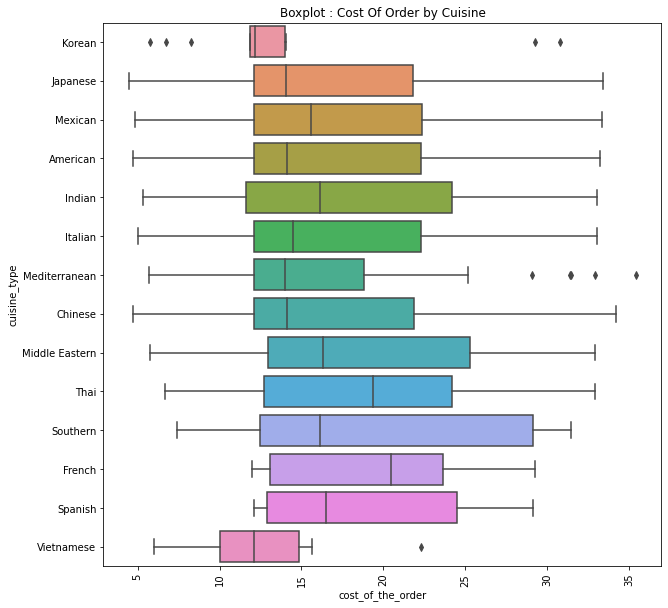

In [112]:
# analysis on the cost of order by cuisine
plt.figure(figsize=(10,10))
plt.title('Boxplot : Cost Of Order by Cuisine')
plt.xticks(rotation = 90)
sns.boxplot(data = df, y ="cuisine_type", x="cost_of_the_order");

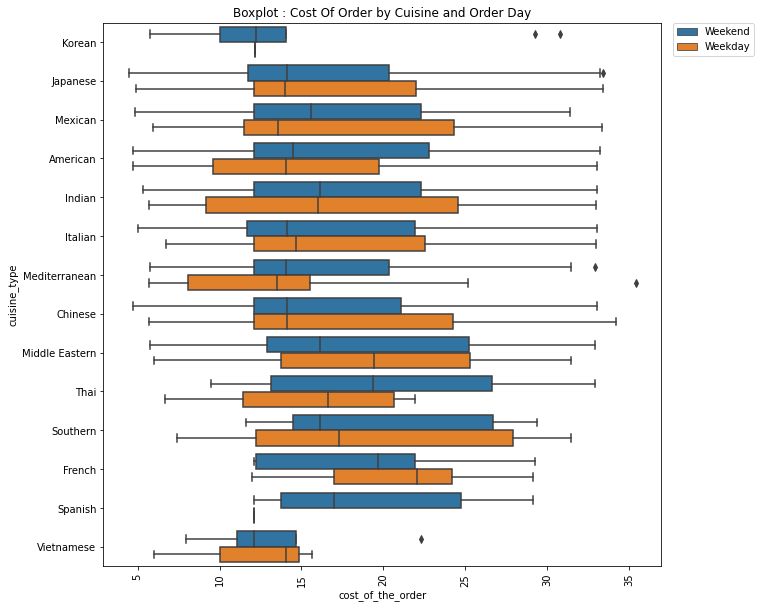

In [113]:
# analysis on the cost of order by cuisine and order day
plt.figure(figsize=(10,10))
plt.title('Boxplot : Cost Of Order by Cuisine and Order Day')
plt.xticks(rotation = 90)
sns.boxplot(data = df, y ="cuisine_type", x="cost_of_the_order",hue = "day_of_the_week");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

**Observation**
- The above boxplot shows the cost of orders grouped by the cusine type
- Korean cusines, Meditarranean and Vietnamese cuisine have outliers in the cost of orders indicating and abnormally low price and high priced value as compared to other cusines in the dataset
- Most of the cost of orders for the cusines are right skewed (positive skewed), indicating relatively higher order price food is placed more.
- Data skewness is relatively more positive as well over the weekdays indicating more orders are placed over the weekdays as compared 
- Outliers are more present on weekend orders which may require a closer outlook.
- Shorter IQR for Korean and Vietnamese cusisine indicate leser order values (variable data) for these cuisines as compared to other cuisine preference

The total sale of food by cuisine is: 
       cuisine_type  cost_of_the_order
0         American            9530.78
1         Japanese            7663.13
2          Italian            4892.77
3          Chinese            3505.62
4          Mexican            1303.85
5           Indian            1235.14
6   Middle Eastern             922.21
7    Mediterranean             711.84
8             Thai             364.95
9           French             356.29
10        Southern             328.11
11         Spanish             227.93
12          Korean             182.02
13      Vietnamese              90.18


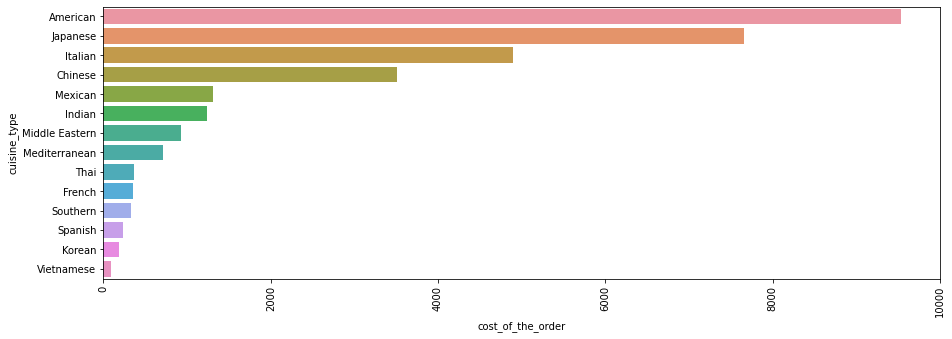

In [114]:
# analysis on the sum cost of order by cuisine

# Group the data by cuisine
df_group_data = df.groupby(['cuisine_type'])

# Calculate the sum of the "cost_of_the_order" column for each group
df_result = df_group_data['cost_of_the_order'].sum().sort_values(ascending = False).reset_index()


# Assign the result to a variable
cost_by_cuisine = df_result
# print the total sale by cuisine 
print('The total sale of food by cuisine is:','\n',cost_by_cuisine)

# using a barplot to show the categorical display
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
sns.barplot(data = df_result, y='cuisine_type',x='cost_of_the_order')
plt.show()

**Observation**
- From the cost of orders analysis, it shows that food order sales revenue (patron preference ) based on top 5 cusines are : American,Japanese,Italian,Chinese and Mexican
- And most orders from these cuisines are generated on weekends 

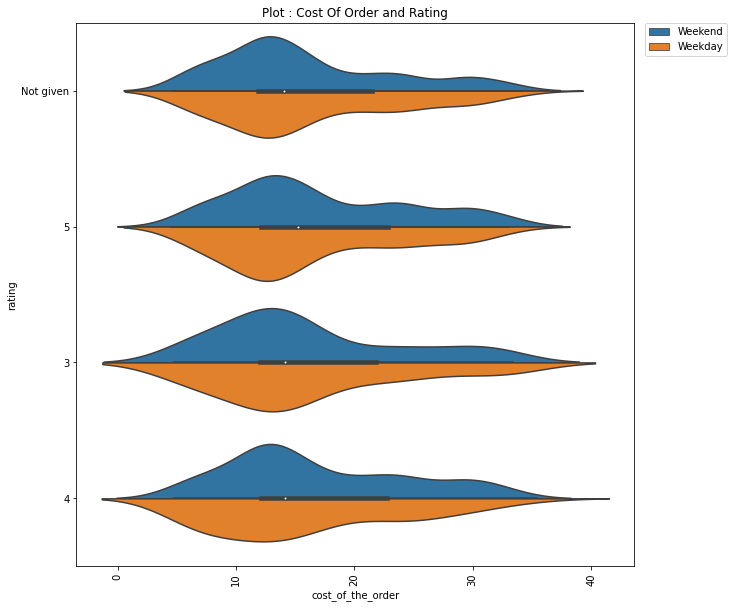

In [115]:
# analysis on the cost of order and ratings
plt.figure(figsize=(10,10))
plt.title('Plot : Cost Of Order and Rating')
plt.xticks(rotation = 90)
sns.violinplot(data = df, y ="rating", x="cost_of_the_order", hue="day_of_the_week", split = True);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

**Observation :**
- The overall shape and distribution of the tips are similar for all the ratings but there is some outlier seen in the the case of ratings 4.
- The median cost of order for Rating 5 is higher than for other ratings
- Ratings 4, 3 and Not Given have the same median which is approximately USD16
- Cost of Order across all ratings have the most probability value at USD14 (approx) 

### *ANALYSIS ON THE FOOD PREPARATION TIME*

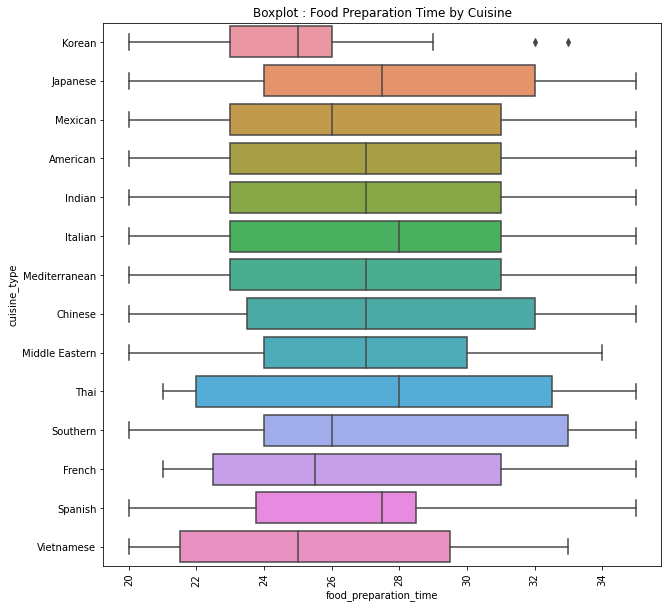

In [116]:
# analysis on the preparation time by cuisine
plt.figure(figsize=(10,10))
plt.title('Boxplot : Food Preparation Time by Cuisine')
plt.xticks(rotation = 90)
sns.boxplot(data = df, y ="cuisine_type", x="food_preparation_time");

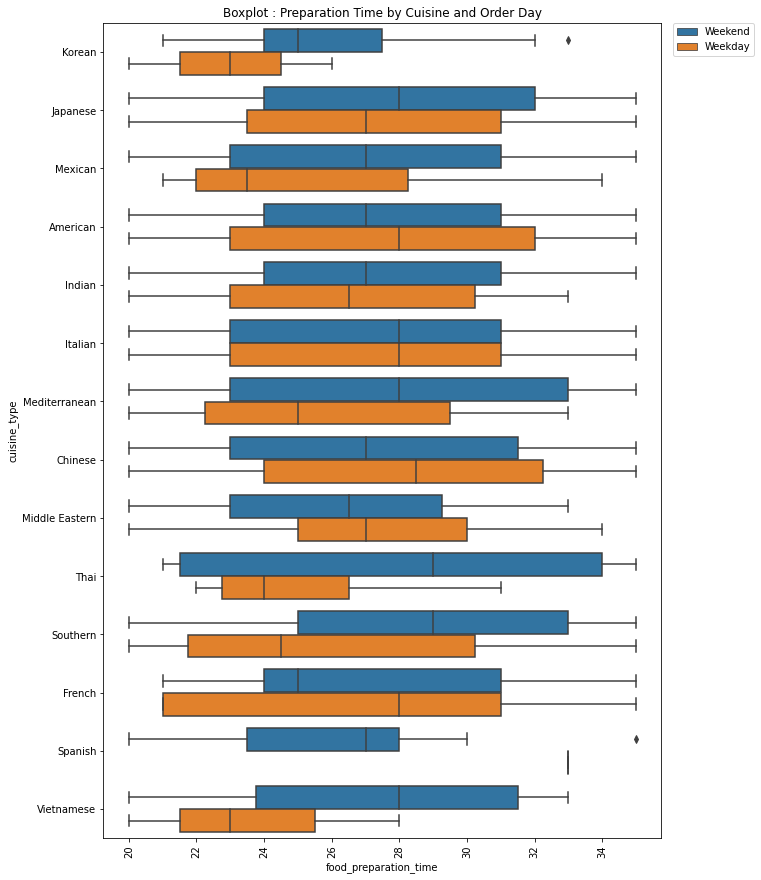

In [117]:
# analysis on the food preparation time by cuisine and order day
plt.figure(figsize=(10,15))
plt.title('Boxplot : Preparation Time by Cuisine and Order Day')
plt.xticks(rotation = 90)
sns.boxplot(data = df, y ="cuisine_type", x="food_preparation_time",hue = "day_of_the_week");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

**Observation :**
- There are outliers in food preparation time present for both Spanish and Korean Cuisine indicating possible data anomalies in the food preparation time which may be looked into further
- There is even distirbution of food preparation time for the Italian Cuisine on both weekends and weekdays indicating that the peparation time is even for both types of day.
- The average foor preparation time is the same for American, Indian and Mediterranean cusine
- Food preparation time has more right skewed data on weekends

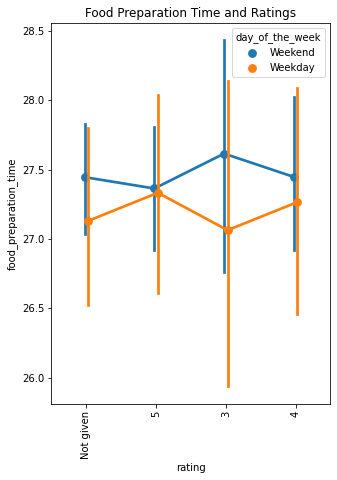

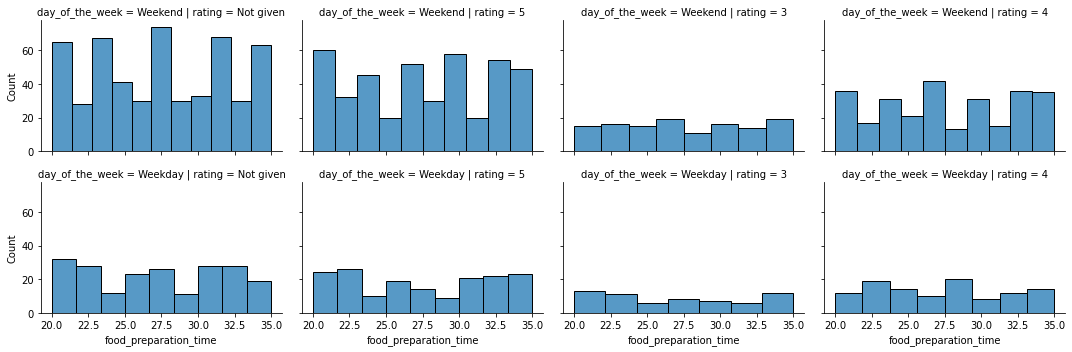

In [118]:
# show the food preparation time and the corresponding ratings (categorical)
plt.figure(figsize=(5,7))
plt.title('Food Preparation Time and Ratings')
plt.xticks(rotation = 90)
sns.pointplot(data = df, x ="rating", y="food_preparation_time", hue = "day_of_the_week", dodge = True);
plt.show()

g = sns.FacetGrid(df, col = 'rating', row = "day_of_the_week", height=2.5, aspect=1.5)
g.map(sns.histplot, 'food_preparation_time');
plt.show()

**Observation Comparison**
- Comparing the pointplot of Food Preparation between Wekend and Weekday, we can observe that all the food ratings have a higher average value for Weekend.
- The higher the average value, the greater the mean of the data set. Meaning that the data points in the dataset are generally larger or closer to the upper end of the range of values.
- As the average value is high, it also means that the sum of food preparation time is high and the number of orders is low.
- The longest time and highest count of time taken for food preparation is approximately around 27 mins during the weekend. 
- It can also be observed that the frequency of the longest food preparation time falls under the category of Not Given Ratings. This is soemthing to be further analysed

### *ANALYSIS ON THE DELIVERY TIME, RATINGS and DAY TYPE*

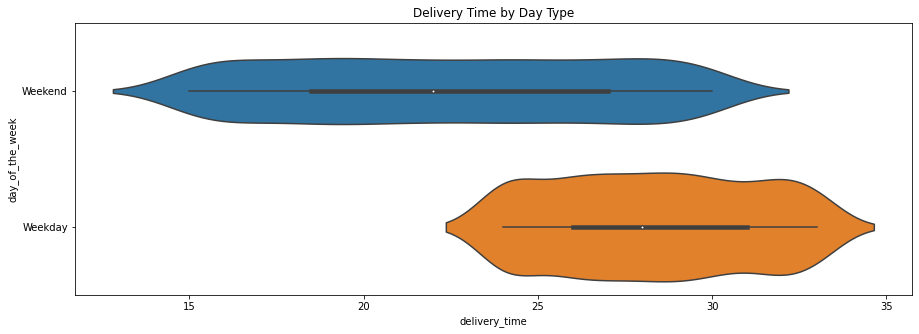

In [119]:
# Analysis of Delivery time against type of day
plt.figure(figsize=(15,5))
plt.title('Delivery Time by Day Type')
sns.violinplot(data = df, x ="delivery_time", y="day_of_the_week");

**Observation Comparison**
- We can observe that the delivery time IQR for weekend is longer than that of the weekday. This can mean that that the middle 50% of the data is spread out over a larger range of delivery time values. This could also indicate that there is a lot of variability in the data and that there are some outliers or extreme values that are stretching the range of the data apart. 
- On the other hand, a short IQR observed on the weekday delivery time in the violin plot means that the middle 50% of the data is concentrated in a small range of values, indicating less variability in the data, and a more symmetric distribution. The narrow violin also indicates that the data is concentrated into a smaller range (number of orders)
- The median (average) delivery time for the weekday data set is higher (approx at 28min) than the weekday which indicates that the delivery time values recorded on the weekdays tend to be higher.

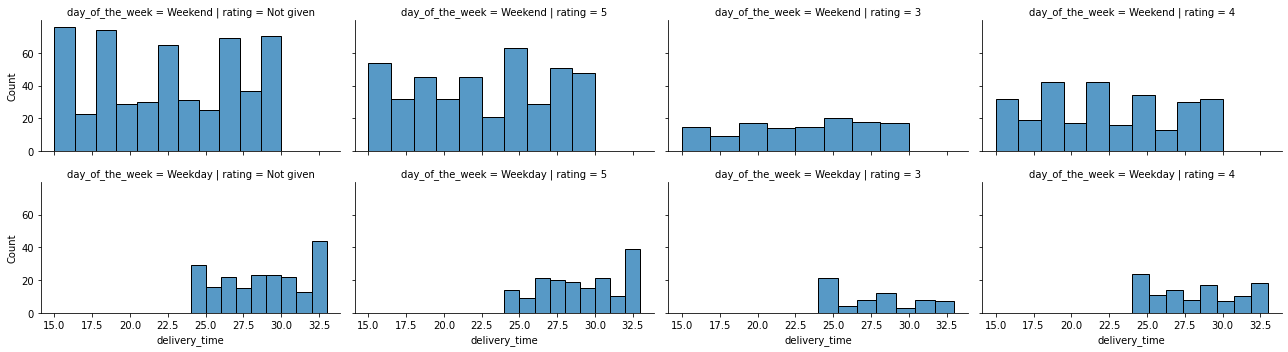

In [120]:
# Analysis of delivery time and the ratings

g = sns.FacetGrid(df, col = 'rating', row = "day_of_the_week", height=2.5, aspect=1.8)
g.map(sns.histplot, 'delivery_time');
plt.show()

**Observation Comparison**
- Rating '3' is the least received rating count for food delivery time on both weekends and weekdays
- Delivery time did not exceed 30min on weekends. This could be due to lesser traffic
- All delivery on weekdays were recorded above 24 mins (ie. no delivery took place before that). This again could be due to high traffic on weekdays.
- There are more orders placed on weekends

### *CORRELATION BETWEEN KEY VARIABLES : COST OF ORDER, PREP TIME, DELIVERY TIME and TOTAL TIME*

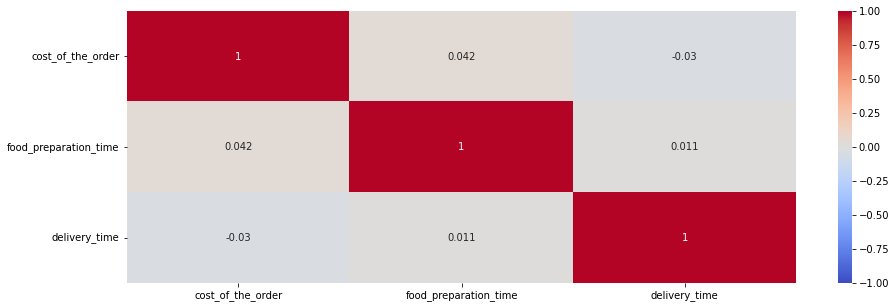

In [121]:
# create the dataframe between numerical variables
corr_df_col = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Correlation between different variables
corr = df.corr()

# compute the correlation matrix
corr_df_col = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()

# create the heatmap
plt.figure(figsize =(15, 5))
sns.heatmap(corr_df_col, annot=True, cmap='coolwarm',vmin=-1,vmax=1);
plt.show()

**Observation Comparison**
- Variables food preparation time and the cost of the order have a positive correlation. This could mean a higher cost of an order could take a longer time to prepare and also reach a customer.
- Variables such as delivery time and cost of the order, are having strong negative correlations. Therefore, the Delivery time is not related to the Cost of an order
- There are variables with slight association between them such as food prepation time and delivery time, showing weak positive correlation.

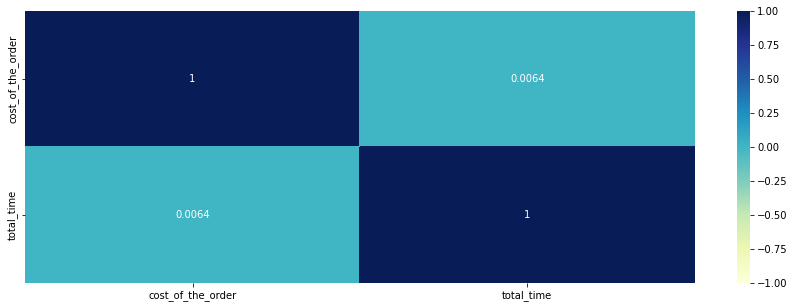

In [122]:
# Lets create a new column : total_time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# create the dataframe between numerical variables
corr_df_col = ['cost_of_the_order', 'total_time']

# Correlation between different variables
corr = df.corr()

# compute the correlation matrix
corr_df_col = df[['cost_of_the_order', 'total_time']].corr()

# create the heatmap
plt.figure(figsize =(15, 5))
sns.heatmap(corr_df_col, annot=True, cmap='YlGnBu',vmin=-1,vmax=1);
plt.show()

**Observation Comparison**
- Variables cost of the order and total time taken to deliver the food have positive correlation, however the relationship is not a strong one.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [123]:
# From earleir analysis, we know that rating is of object type instead of integer
# To avoid changes in the original dataframe, we will use a copy function

# Make a copy all the values in the rating column that is besides 'Not given'
df_copy = df[df['rating'] != 'Not given'].copy()

# Fixing data type single column rating from type : object to integer for mathematical computation
df_copy['rating'] = df_copy['rating'].astype('int')  
  
# Lets get the total nummerical rating counts (count) by each restaurant (groupby), where ratings are != "Not given"
# then sort these values in the descending order
# then place it into a data frame, so reset_index is used
# then list down only the top 10 restaurant

df_rating_count = df_copy.groupby('restaurant_name').count()[['rating']].sort_values('rating', ascending=False).reset_index().head(10)
df_rating_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [124]:
#checking the data type of the column again to ensure that the change has been executed properly
df_rating_count.dtypes

restaurant_name    object
rating              int64
dtype: object

In [125]:
# List the restaurants in the above dataframe that has a rating count of more than 50
restaurant_names = df_rating_count[df_rating_count['rating'] >50]['restaurant_name']

# Check if restaurant_names with count > 50 is in the df_copy data frame
ave_rating_5 = df_copy[df_copy['restaurant_name'].isin(restaurant_names)].copy()

# To list the restaurants with mean > 4
# Get the mean ratings of each restaurant (groupby) from the initial data_copy data frame
# Check if the restaurant_names is in the data_copy df
# then sort these values in the descending order
# then place it into a data frame, so reset_index is used
# then use the drop /replace values from the column with Empty String (dropna)

ave_rating_5.groupby('restaurant_name').mean()[['rating']].sort_values('rating', ascending=False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


#### Observations:
The restaurants fulfilling the criteria : rating count of more than 50 and the average rating should be greater than 4 are 
- Shake Shack, The Meatball Shop, Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [126]:
orders = df['cost_of_the_order'] # Column of orders
commission = 0

for order in orders:        # loop each order and calculate the commission
    if order > 20:
        commission += order * 0.25
    elif order > 5:
        commission += order * 0.15

print("The Net Revenue generated by FoodHub company across all orders is USD", Decimal(commission).quantize(Decimal("0.00")))

The Net Revenue generated by FoodHub company across all orders is USD 6166.30


#### Observations:
The Net Revenue generated by FoodHub company across all orders is USD 6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [127]:
# Lets create a new column : total_time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#Percentage of orders takng more than 60 minutes to get delivered from the time the order is placed
#Get the count of all orders where the total time is greater than 60minutes
order_count = df[df['total_time']>60]
print('Total number of orders taking more than 60 minutes:', order_count.shape[0])   # shape[0] to display the row value only

# to calculate the percentage of orders
order_percentage = (order_count.shape[0] / df.shape[0]) * 100                        # total order count > 60 over total orders in table * 100  
print('Percentage of orders taking more than 60 minutes for delivery is approximately:', round(order_percentage),'%')    

Total number of orders taking more than 60 minutes: 200
Percentage of orders taking more than 60 minutes for delivery is approximately: 11 %


#### Observations:
1. Total Percentage of orders taking more than 60 minutes from the time of order till delivery to customer is approximately 11%
2. A total of 200 orders take more than 60 minutes to deliver

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [128]:
# Check the mean delivery time on weekend
weekend = df[df['day_of_the_week'] == 'Weekend']
mean_weekend = weekend.delivery_time.mean()

# Check the mean delivery time on weekday
weekday = df[df['day_of_the_week'] == 'Weekday']
mean_weekday = weekday.delivery_time.mean()

#Analyze the mean delivery time between day type orders
print('The mean delivery time of food order is :',round(mean_weekend),'minutes on weekends and',round(mean_weekday),'minutes on weekdays')

The mean delivery time of food order is : 22 minutes on weekends and 28 minutes on weekdays


#### Observations:
1. The average delivery time of food order is higher on weekdays (28 minutes)than on weekends (approximately 22 minutes)
2. The volume of orders on weekends are more than on the weekdays

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Insight:**

We have analysed a dataset of around 1900 food orders by FoodHub aggregator, with 1200 users currently registered to use the food app to order their food online from 178 registered restaurants offering 14 different types of cuisine.

The main area of interest for FoodHub is obviously to earn money by collecting a fixed margin from the orders made to the restaurants registered with them.. To achieve this, they would need to increase the user demand of their online food app and user experience which will directly increase their Nett Revenue.

From a business perspective, understanding the user choices from the frequency of cuisine ordered, the value of the cost of orders placed and the ratings given by the users will give FoodHub better informed decisions.
Ratings received from users could stem from various angles such as overall delivery time (from the time order is made), overall food taste satisfaction from the restaurant, and also the amount of money spent on the order relatively.


### Conclusions:
**We can conclude that :**

1. There is high demand for American, Japanese, Italian and Chinese, Mexican and Indian cuisine comparatively to the rest. We can notably observe that the restaurants that generated a total cost of order greater than USD1000 and contributed a higher revenue to FoodHub were of the following cuisines.

2. There is a total of 178 types of restaurant registered with FoodHub. However, the preferred top 5 restaurants orders repeatedly are : Shake Shack : American cuisine (219 orders), The Meatball Shop : Italian (132 orders), Blue Ribbon Sushi : Japanese (119 orders), Blue Ribbon Fried Chicken : American (96 orders), Parm : Italian (68). 

3. Most of the cost of orders for the cusines are right skewed (positive skewed), indicating a relatively small number of orders are causing the overall spending to be higher than what is typical for the majority of orders. The median being less than the mean confirms this, as it indicates that there are a few high-cost orders that are pushing the average spending up. 

4. The rate of food order is higher on the weekends (1351 orders with total cost of order: USD22k) as compared to weekdays (547 with total cost of order: USD9k). 

5. The median cost of order for weekend is greater than the median cost of order for weekdays. This indicates that on average customers tend to spend more money on weekends than on weekdays. This could be due to a variety of factors such as increased leisure time, more visitations on weekends, or different promotions or events taking place on weekends.

6. On average, a user is spending approximately USD16.50 for a meal and majority of orders fall between USD12.08 and USD22.30. Total number of orders costing more than USD20 is 29% (555 Orders) indicating a relatively small number of orders

7. Majority of the food delivery time falls between 20 minutes and 28 minutes, with the average delivery time at 24 minutes. There are some delivery time reaching upto 33 minutes which could be due to traffic, distance, or other factors such as operation issues with the company's logistics. This needs to be addressed if the latter to ensure it does not lead to customer dissatisfaction and potentially harm the company's reputation

8. We also observed that Delivery time did not exceed 30min on weekends. This could be due to lesser traffic. All delivery on weekdays were recorded 24 mins and above (ie. no delivery took place before that). This again could be due to high traffic on weekdays.

9. A total of 736 orders (39%) were not given any ratings. We would need to find ways to encourage users to provide rating for future business analysis

10. We would need to investigate further as to the reason for low count of food orders and with Ratings = '3' on both weekday and weekend. 

### Recommendations:

*  People love discounts and freebies, especially when buying food. Develop strategies to attract more customers to increase sales on weekdays or offer promotions to specific target segment that is more likely to visit and spend more. 
*  The entire experience of food ordering and consuming should be satisfying and convenient. This particularly also involves reasonably fast food delivery time. With the average delivery time data captured, the App can use this info to display the estimated delivery time for user decision, before placing an order.
*  The company should also consider opening more branches to common preferred restaurants to reduce overall delivery time of the food (especially on weekdays where traffic can be higher).
*  Product reviews, testimonies and Star ratings in a great sales tool. Users tend to read reviews always prior to purchasing any food. Consider incorporating a quick reminder to custoemr to rate the food and receive a surprise gift. This will surely encourage the users to Rate the OrderID once received.
*  For the bottom five cuisine popularity (ie. Vietnamese, Korean, Spanish), tying up a promotional strategy with these restaurants can boost their sales. Eg: Pairing the customer order with a First Purchase Coupon from any of these restaurants for the next order. This also encourages repetitive orders.

---